In [2]:
import pandas as pd
import string
from tqdm.auto import tqdm, trange
from nltk.stem.snowball import SnowballStemmer 
from nltk import word_tokenize
import nltk
from pandas import DataFrame
from pandas import Series
import re
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_5632.csv')

df


,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_sw,text_lemm
0,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...
1,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...
2,2022-01-03,7,70,https://mbasic.facebook.com/groups/32275791783...,Кто может выполнить комплекс строительных рабо...,Кто может выполнить комплекс строительных рабо...,кто может выполнить комплекс строительных рабо...,выполнить комплекс строительных работ нового п...,выполнять комплекс строительный помещение пека...
3,2022-01-03,11,220,https://mbasic.facebook.com/groups/32275791783...,"енно). Вообще, человек из жкх сказал, что обыч...",енно Вообще человек из жкх сказал что обычно е...,енно вообще человек из жкх сказал что обычно е...,енно жкх присылают какие справки польской нало...,енное жкх присылать справка польский налоговый...
4,2022-01-04,12,0,https://mbasic.facebook.com/groups/32275791783...,"Кто еще в раздумьях и не знает, какую полициал...",Кто еще в раздумьях и не знает какую полициаль...,кто еще в раздумьях и не знает какую полициаль...,раздумьях какую полициальную школу выбрать sta...,раздумье полициальный выбирать start центр вар...
...,...,...,...,...,...,...,...,...,...
5627,2022-07-21,24,30,https://mbasic.facebook.com/groups/32275791783...,"Здравствуйте, произошла очень неприятная ситуа...",Здравствуйте произошла очень неприятная ситуац...,здравствуйте произошла очень неприятная ситуац...,произошла неприятная ситуация автовокзале захо...,происходить неприятный ситуация автовокзал зах...
5628,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Подскажите пожалуйста,из Тересполя в Брест,кро...",Подскажите пожалуйста из Тересполя в Брест кро...,подскажите пожалуйста из тересполя в брест кро...,подскажите тересполя брест автобуса ездят каки...,тересполь брест автобус ездить маршрутка приез...
5629,2022-07-21,0,40,https://mbasic.facebook.com/groups/32275791783...,"Добрый день, кто-нибудь знает, можно ли привит...",Добрый день кто нибудь знает можно ли привить ...,добрый день кто нибудь знает можно ли привить ...,привить covid желательно pfizer ’ ом родителей...,прививать covid желательно pfizer ’ ом родит...
5630,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",Добрага дня шаноўныя Можа тут нехта працуе ў т...,добрага дня шаноўныя можа тут нехта працуе ў т...,добрага дня шаноўныя нехта працуе турыстычных ...,добрага шаноўныя нехт працуй турыстычный агенц...


In [5]:
import requests
from bs4 import BeautifulSoup 
import time
from urllib.parse import urlparse, urljoin
from tqdm.notebook import tqdm
import pickle 
import spacy 
import ru_core_news_sm 
import string 
import nltk 

In [6]:
nlp = ru_core_news_sm.load() 

In [7]:
with open ('C:/Users/dell/Desktop/pliki/stop.txt', 'r',  encoding='utf-8') as stop_file:
    russian_stopwords = [word.strip() for word in stop_file.readlines()]

In [8]:
stopwords=russian_stopwords

In [9]:
# Parser for reviews
punctuations = string.punctuation
#stopwords = stopwords

def spacy_processor(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens


In [10]:
text_data = [spacy_processor(text) for text in tqdm(df['text_lemm'])]

  0%|          | 0/5632 [00:00<?, ?it/s]

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.95, 
                             min_df=2, 
                             ngram_range=(1,2),
                             max_features=5000)
data_vectorized = vectorizer.fit_transform(text_data)


In [12]:
data_vectorized[0].todense().shape

(1, 5000)

In [13]:
import pandas as pd
pd.DataFrame(data_vectorized.todense(), 
             columns=vectorizer.get_feature_names())

,adobe,al,and,anna,app,app viber,apple,are,art,art ust,...,ўдзячны,ўжо,ўкраіне,ўмовы,ўсе,ўсё,ўсім,ўсім падкажыце,ўсіх,ўцекачоў
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation, NMF

NUM_TOPICS = 15

# Latent Semantic Indexing Model using Truncated SVD
lsi = TruncatedSVD(n_components=NUM_TOPICS)
data_lsi = lsi.fit_transform(data_vectorized)

# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, 
                                max_iter=15, 
                                learning_method='online', 
                                verbose=True)
data_lda = lda.fit_transform(data_vectorized)

# Non-Negative Matrix Factorization Model
nmf = NMF(n_components=NUM_TOPICS)
data_nmf = nmf.fit_transform(data_vectorized)

iteration: 1 of max_iter: 15
iteration: 2 of max_iter: 15
iteration: 3 of max_iter: 15
iteration: 4 of max_iter: 15
iteration: 5 of max_iter: 15
iteration: 6 of max_iter: 15
iteration: 7 of max_iter: 15
iteration: 8 of max_iter: 15
iteration: 9 of max_iter: 15
iteration: 10 of max_iter: 15
iteration: 11 of max_iter: 15
iteration: 12 of max_iter: 15
iteration: 13 of max_iter: 15
iteration: 14 of max_iter: 15
iteration: 15 of max_iter: 15


C:\Users\dell\.anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [15]:
def print_topics(model, vectorizer, n_words=15):
    for idx, topic in enumerate(model.components_):
        print()
        print(f'Topic {idx}:', [(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-n_words - 1:-1]]) 

In [16]:
nmf.components_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.29185030e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.58497353e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.80249693e-03, 1.87696849e-02, 8.02174695e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.39461051e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [17]:
nmf.components_.shape

(15, 5000)

In [18]:
data_vectorized.shape

(5632, 5000)

In [19]:
#the most characteristic word for topic 
np.argmax(nmf.components_[8])

587

In [21]:
vectorizer.get_feature_names()[587]

'банк'

In [22]:
print_topics(nmf, vectorizer)


Topic 0: [('виза', 3.9552396187443732), ('гуманитарный', 1.316620667754554), ('приглашение', 1.2033751528514125), ('гуманитарный виза', 1.170644119321149), ('рабочий', 0.955061284295656), ('рабочий виза', 0.7984770369562155), ('заканчиваться', 0.46653953633978523), ('находиться', 0.39425852344809004), ('продлять', 0.3721244676052281), ('подаваться', 0.35928737202060756), ('польша', 0.3537310082000272), ('выезжать', 0.33665170721143645), ('подача', 0.3219420648995027), ('открывать', 0.31437593384027473), ('визовый', 0.3088137824701674)]

Topic 1: [('варшава', 2.203245150773081), ('посоветовать', 0.1833621344844025), ('купить', 0.12891399126333028), ('магазин', 0.10787224214900622), ('жильё', 0.1044338265702113), ('находиться', 0.10432036766942733), ('русскоязычный', 0.10248250861089885), ('приезжать', 0.10216350091437694), ('возможность', 0.09671746784207366), ('приезжать варшава', 0.09514880597597088), ('центр варшава', 0.09304396880104944), ('желательно', 0.09216415611237457), ('варш

In [23]:
print_topics(lsi, vectorizer)


Topic 0: [('виза', 0.30663721997069887), ('варшава', 0.290992001415854), ('польша', 0.2832402015345445), ('беларусь', 0.21887787206353004), ('карта', 0.20716956113819932), ('польский', 0.17899556824910715), ('рб', 0.17413450764443583), ('ехать', 0.17364290354595735), ('граница', 0.14214064107331412), ('минск', 0.13519296722417282), ('побыт', 0.11963593527191843), ('помогать', 0.11297488154926777), ('поляк', 0.10413532256716025), ('приглашение', 0.10325542358314559), ('информация', 0.10287315643317986)]

Topic 1: [('варшава', 0.4721932484003257), ('ехать', 0.3012403377308698), ('минск', 0.2764157223673858), ('передавать', 0.1762064213554547), ('минск варшава', 0.12221219060698714), ('близкий', 0.11955660656925657), ('варшава минск', 0.1128791289667799), ('ехать варшава', 0.09953267300427052), ('брест', 0.08146011907215396), ('квартира', 0.07952456534995105), ('ехать минск', 0.07178495422464175), ('ехать близкий', 0.06751085536707002), ('лс', 0.06693817141382503), ('завтра', 0.065647970

In [24]:
print_topics(lda, vectorizer)


Topic 0: [('личный сообщение', 9.874787807514636), ('сообщение', 8.624099380997274), ('украина', 7.969907393057927), ('продавать', 7.58789360353932), ('велосипед', 6.445797454894567), ('краков', 6.4273065400940865), ('личный', 6.20872588463787), ('пригород', 6.095405371566524), ('заказывать', 5.342245313832494), ('коробка', 5.249710035008189), ('покупать', 4.914214560917552), ('дозваниваться', 4.740308212715231), ('товар', 4.561872169947356), ('гданьск', 4.420162121683681), ('попадать', 4.2090019358492725)]

Topic 1: [('ехать', 51.868416966381005), ('минск', 48.03026394892406), ('варшава', 39.34270713701061), ('передавать', 29.405356747898427), ('брест', 26.90534020602351), ('близкий', 21.649521352325515), ('завтра', 19.462364459900957), ('автобус', 18.72733256612026), ('минск варшава', 18.24490001371533), ('варшава минск', 17.207309098412235), ('гродно', 15.757855483185548), ('ехать варшава', 15.06239034812031), ('передача', 13.434306621565801), ('чемодан', 10.33813817976912), ('небо

In [43]:
#Visualisation of NMF

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
import random
import pandas as pd

number_of_colors = NUM_TOPICS

reducer_umap = umap.UMAP(n_components=2, random_state=42)
reducer_tsne = TSNE(n_components=2, random_state=42)

reduced_umap = reducer_umap.fit_transform(data_vectorized)
reduced_tsne = reducer_tsne.fit_transform(data_vectorized)

In [44]:
x_umap = reduced_umap.T[0]
y_umap = reduced_umap.T[1]

x_tsne = reduced_tsne.T[0]
y_tsne = reduced_tsne.T[1]

label = np.argmax(data_nmf, axis=1)

color_map = dict(enumerate(['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]))

In [45]:
source = pd.DataFrame({'x_umap': x_umap, 
                       'y_umap': y_umap,
                       'x_tsne': x_tsne,
                       'y_tsne': y_tsne,
                       'topic': label
                      })
source['color'] = source.topic.map(color_map)

In [46]:
source.head()

,x_umap,y_umap,x_tsne,y_tsne,topic,color
0,14.905121,10.907146,34.424026,-42.214764,8,#07278E
1,14.665751,7.352777,1.444762,-36.208858,6,#AEC2BE
2,11.353724,6.939977,14.362604,5.149408,10,#FC5DD5
3,14.651814,7.099864,1.608856,-35.350124,6,#AEC2BE
4,11.301749,6.247120,-34.767757,26.333559,1,#00AD30


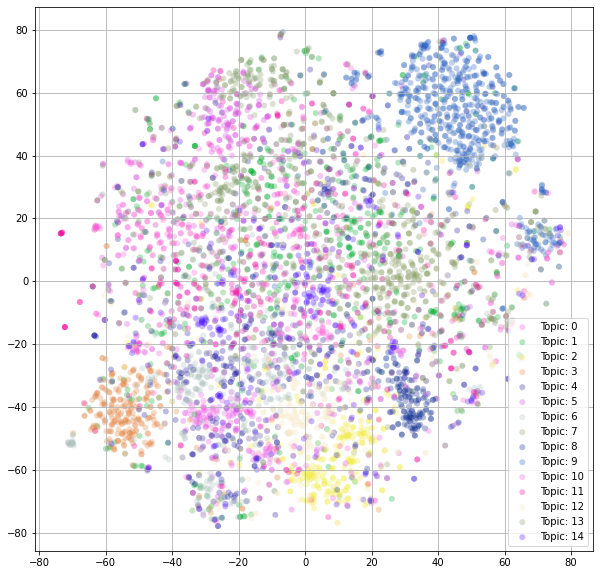

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    
    ax.scatter(data_vis['x_tsne'], 
               data_vis['y_tsne'], 
               c=color, 
               label=f'Topic: {n}', 
               alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

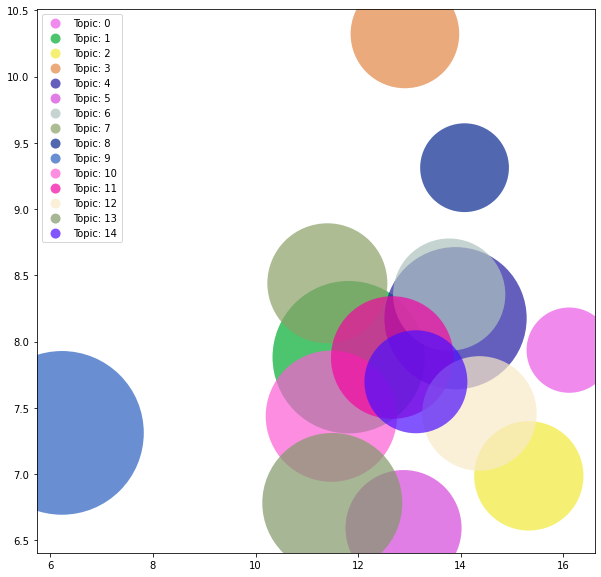

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    x = data_vis.x_umap.mean()
    y = data_vis.y_umap.mean()
    s = data_vis.shape[0]
    ax.scatter(x, 
               y, 
               c=color, 
               label=f'Topic: {n}',
               s=s*40,
               alpha=0.7, 
               edgecolors='none')

#ax.legend(loc='lower left', prop={'size': 10}, fontsize=20)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
for leg in range(NUM_TOPICS):
    lgnd.legendHandles[leg]._sizes = [100]

#ax.grid(True)

plt.show()

In [49]:
#Visualisation of LSI

number_of_colors = NUM_TOPICS

reducer_umap = umap.UMAP(n_components=2, random_state=42)
reducer_tsne = TSNE(n_components=2, random_state=42)

reduced_umap = reducer_umap.fit_transform(data_vectorized)
reduced_tsne = reducer_tsne.fit_transform(data_vectorized)

In [50]:
x_umap = reduced_umap.T[0]
y_umap = reduced_umap.T[1]

x_tsne = reduced_tsne.T[0]
y_tsne = reduced_tsne.T[1]

label = np.argmax(data_lsi, axis=1)

color_map = dict(enumerate(['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]))

In [52]:
source = pd.DataFrame({'x_umap': x_umap, 
                       'y_umap': y_umap,
                       'x_tsne': x_tsne,
                       'y_tsne': y_tsne,
                       'topic': label
                      })
source['color'] = source.topic.map(color_map)

In [53]:
source.head()

,x_umap,y_umap,x_tsne,y_tsne,topic,color
0,14.905121,10.907146,34.424026,-42.214764,8,#DDC9AE
1,14.665751,7.352777,1.444762,-36.208858,6,#ADD0FA
2,11.353724,6.939977,14.362604,5.149408,13,#684930
3,14.651814,7.099864,1.608856,-35.350124,6,#ADD0FA
4,11.301749,6.247120,-34.767757,26.333559,0,#6E6633


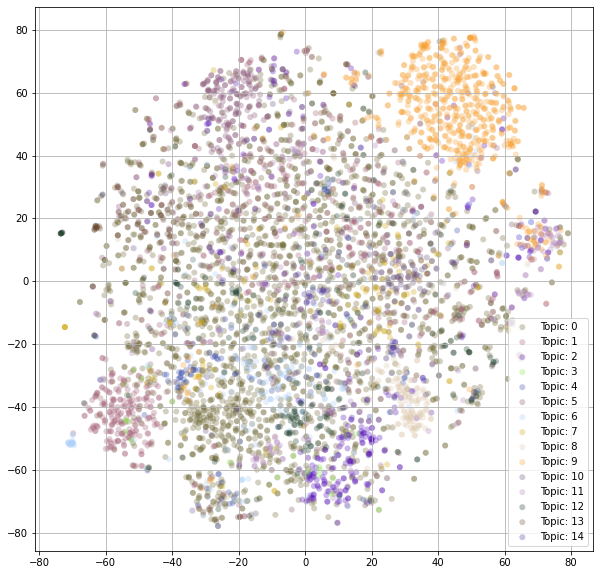

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    
    ax.scatter(data_vis['x_tsne'], 
               data_vis['y_tsne'], 
               c=color, 
               label=f'Topic: {n}', 
               alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

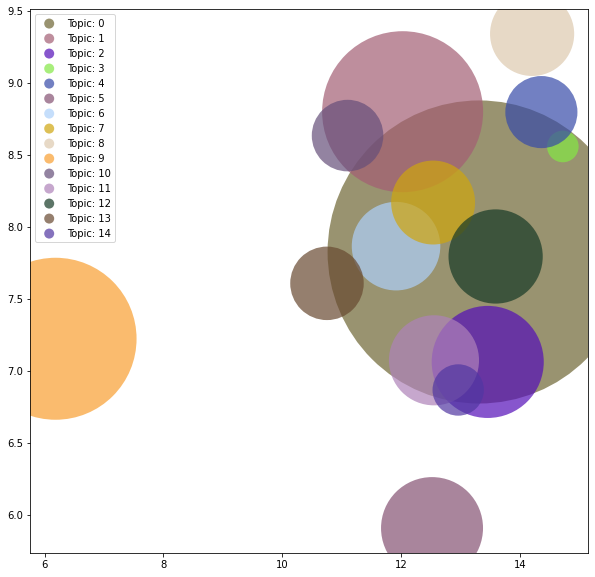

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    x = data_vis.x_umap.mean()
    y = data_vis.y_umap.mean()
    s = data_vis.shape[0]
    ax.scatter(x, 
               y, 
               c=color, 
               label=f'Topic: {n}',
               s=s*40,
               alpha=0.7, 
               edgecolors='none')

#ax.legend(loc='lower left', prop={'size': 10}, fontsize=20)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
for leg in range(NUM_TOPICS):
    lgnd.legendHandles[leg]._sizes = [100]

#ax.grid(True)

plt.show()

In [56]:
#Visualisation of LDA

number_of_colors = NUM_TOPICS

reducer_umap = umap.UMAP(n_components=2, random_state=42)
reducer_tsne = TSNE(n_components=2, random_state=42)

reduced_umap = reducer_umap.fit_transform(data_vectorized)
reduced_tsne = reducer_tsne.fit_transform(data_vectorized)

In [57]:
x_umap = reduced_umap.T[0]
y_umap = reduced_umap.T[1]

x_tsne = reduced_tsne.T[0]
y_tsne = reduced_tsne.T[1]

label = np.argmax(data_lda, axis=1)

color_map = dict(enumerate(['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]))

In [58]:
source = pd.DataFrame({'x_umap': x_umap, 
                       'y_umap': y_umap,
                       'x_tsne': x_tsne,
                       'y_tsne': y_tsne,
                       'topic': label
                      })
source['color'] = source.topic.map(color_map)

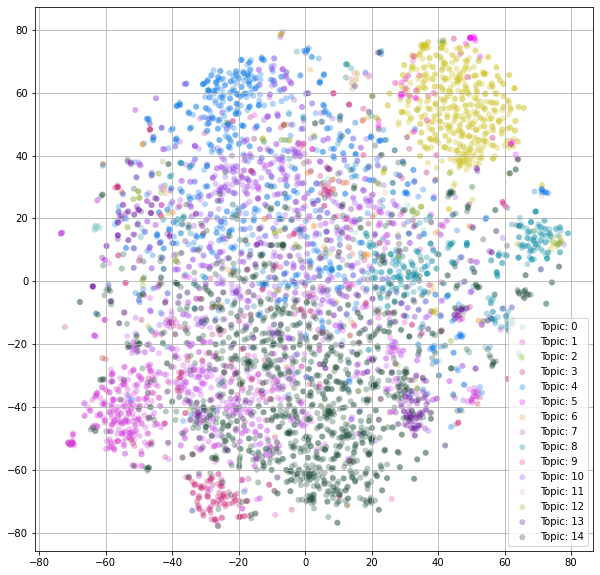

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    
    ax.scatter(data_vis['x_tsne'], 
               data_vis['y_tsne'], 
               c=color, 
               label=f'Topic: {n}', 
               alpha=0.3, 
               edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

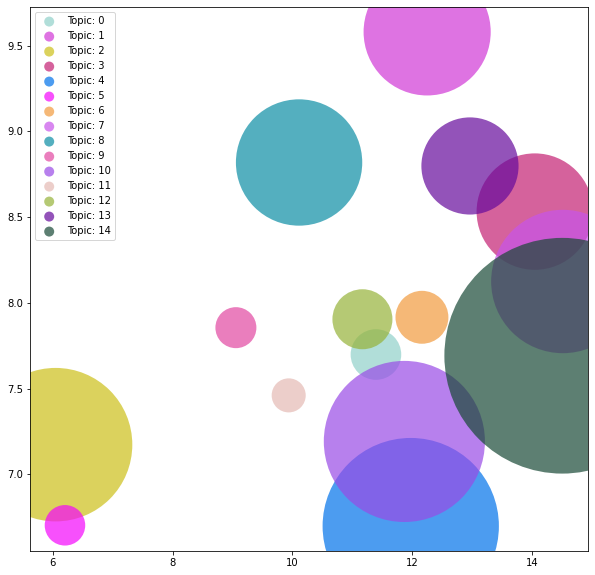

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
for n, color in enumerate(color_map.values()):
    
    data_vis = source[source['color']==color].copy() 
    x = data_vis.x_umap.mean()
    y = data_vis.y_umap.mean()
    s = data_vis.shape[0]
    ax.scatter(x, 
               y, 
               c=color, 
               label=f'Topic: {n}',
               s=s*40,
               alpha=0.7, 
               edgecolors='none')

#ax.legend(loc='lower left', prop={'size': 10}, fontsize=20)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
for leg in range(NUM_TOPICS):
    lgnd.legendHandles[leg]._sizes = [100]

#ax.grid(True)

plt.show()

In [42]:
import numpy as np
new_text = 'Здравствуйте, дорогие земляки! Подскажите, пожалуйста, можно ли находясь на территории Польши по рабочей действующей визе, гражданину РБ, поехать в Германию поездом? Проверяют ли паспорта у пассажиров и вообще  законно ли это? Не ориентируюсь совершенно в теперешней ситуации. Буду благодарна за любую информацию.'
new_corpus = [new_text]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

6

In [33]:
new_text2 = 'Делюсь информацией, если кому-то будет полезно: Сегодня забрала umiejscowienie aktu urodzenia. Делалось 1 месяц, вписали девичью фамилию матери на основании справки из загса о заключении брака родителей. Свидетельств отца и матери не просили даже показать.Urząd sranu cywilnego w Starych Babicach. Записывалась в конце июля на конец сентября'
new_corpus = [new_text2]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

12

In [34]:
new_text3 = 'Всем привет. Тут в группе упоминали чат-бот для поиска жилья. Может кто-нибудь дать ссылку на него? Не сохранила сразу. А сейчас по поиску пробовала разные варианты, не нашла 🥺 Буду очень благодарна'
new_corpus = [new_text3]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

11

In [35]:
new_text4 ='В новый салон в Варшаве требуются сотрудники: массажист (классический, лимфодренажный, антицеллюлитный) и косметолог. Официальное оформление. Заработная плата 4500 злотых нетто. Работа в две смены  по 8 часов в день. ( График обсуждаем) Перерыв между массажами 30 минут.🙏🏽Заинтересованным писать в личку'
new_corpus = [new_text4]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

10

In [36]:
new_text5 ='Здравствуйте. Можно ли устроиться на работу в школе учителем английского языка,  имея образование РБ и опыт работы в школе РБ.знание польского имеется Б1 здан екзамен'
new_corpus = [new_text5]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

6

In [37]:
next_text7 ='Доброго дня всем. Просмотрела предыдущие посты на тему. Прошу не путать психиатра и психолога. Нам нужен врач психиатр, консультация по СДВГ( синдром дефецита внимания гиперактивность). Подросток. Возможно кто то в Варшаве уже обращался к специалисту с таким конкретным запросом. Заранее благодарю.'
new_corpus = [next_text7]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

13

In [38]:
next_text8 ='Всем здравствуйте. Может есть соотечественники с фирмой по изготовлению мебели. Нужно сделать каркас кровати не стандартный 140-190.'
new_corpus = [next_text8]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

14

In [39]:
next_text9 ='Доброго дня всем. По просьбе хозяев публикую объявление. Сдается 3х комнатная квартира в Варшаве/Wola. 65кв/м. Меблирована, есть вся техника, огромный балкон (20кв/м). место в подземном паркинге.По оплате 6000 PLN за все, включая воду/электричество/интернет.Прожили там полгода - тепло, соседей не слышно, проблем вообще никаких. Сьезжаем только потому, что не подходит район.'
new_corpus = [next_text9]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

7

In [40]:
next_text10 ='Добрый вечер! У меня такой вопрос, въехала в Польшу по рабочей визе, с приглашением рабочим, но по этому приглашению не работала, две недели назад выехала из страны по необходимости, какие мне нужны документы сейчас для пересечения границы? заранее благодарна за ответы'
new_corpus = [next_text10]
new_vectorized = vectorizer.transform(new_corpus)
np.argmax(nmf.transform(new_vectorized))

0

In [66]:
# Getting the wordclouds from topics
max_df = 0.95 
min_df = 2
#max_features= 5000
tv = TfidfVectorizer(max_df=max_df, min_df=min_df, max_features=None,lowercase=True)
#Fitting count vectorizer 
data_vectorized = vectorizer.fit_transform(text_data)

#getting the terms(features) generated by count vectorizer
terms = vectorizer.get_feature_names()

In [67]:
total_topics =15
# next step is to implement Latent Drichilet Allocation 
# next step is to implement NMF

nmf = NMF(n_components=total_topics)
nmfTransform = nmf.fit_transform(data_vectorized)



# lda = LatentDirichletAllocation(n_components=total_topics, 
#             max_iter=15,learning_method='online', 
#             learning_offset=15,random_state=1234)
# ldaTransform = lda.fit_transform(data_vectorized)

#declaring number of terms we need per topic
terms_count = 25

C:\Users\dell\.anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\dell\.anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [68]:
vocabulary = vectorizer.get_feature_names()

In [73]:
for i, comp in enumerate(nmf.components_):
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:15]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
виза гуманитарный приглашение гуманитарный виза рабочий рабочий виза заканчиваться находиться продлять польша подаваться выезжать подача открывать визовый 

Topic 1: 
варшава посоветовать купить магазин находиться жильё русскоязычный приезжать возможность приезжать варшава центр варшава желательно варшава минск ехать варшава варшава купить 

Topic 2: 
карта побыт поляк карта поляк карта побыт подаваться подаваться карта сталый сталый побыт подача получение побыт карта получение карта подавать децизия 

Topic 3: 
ехать минск передавать близкий минск варшава брест варшава минск ехать варшава ехать близкий ехать минск автобус варшава передавать передача завтра гродно 

Topic 4: 
беларусь польша беларусь польша выезжать польша беларусь украина граница доверенность выезжать беларусь жыв беларусь жыв приезжать гражданин отправлять карантин 

Topic 5: 
польский язык польский язык английский репетитор уровень знание онлайн знание польский английский язык переводить репетитор польский

In [74]:
from wordcloud import WordCloud


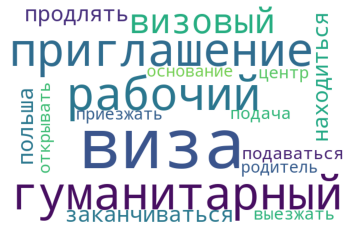

In [95]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400, colormap = 'viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


draw_word_cloud(0)

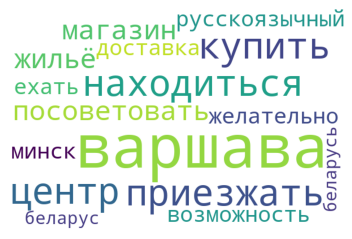

In [96]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(1)

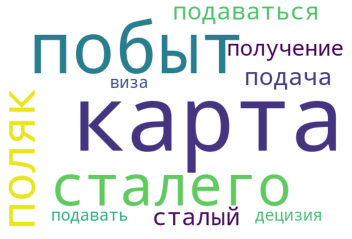

In [97]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(2)

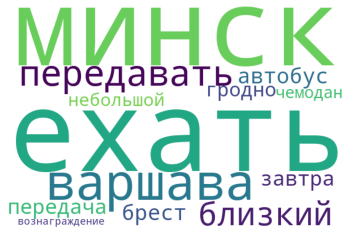

In [98]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(3)

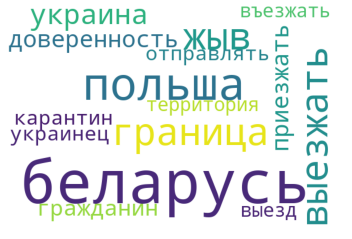

In [99]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(4)

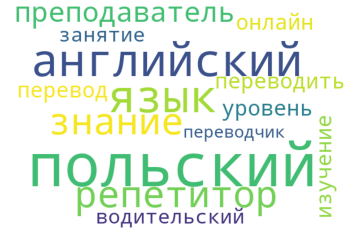

In [100]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(5)

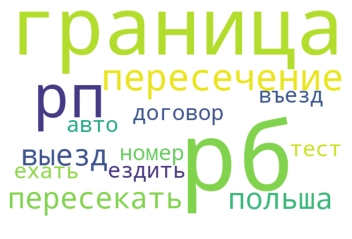

In [101]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(6)

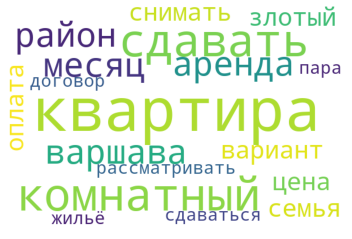

In [102]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(7)

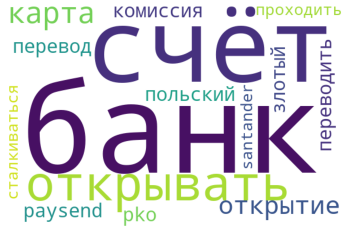

In [103]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(8)

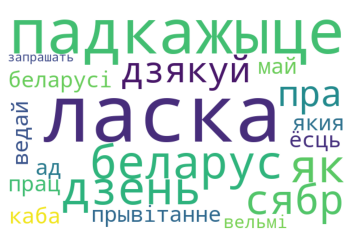

In [104]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(9)

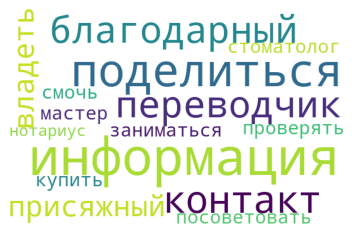

In [105]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(10)

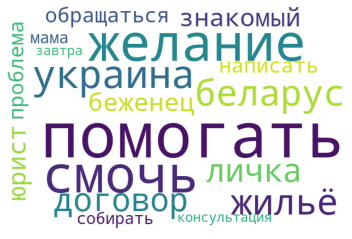

In [106]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(11)

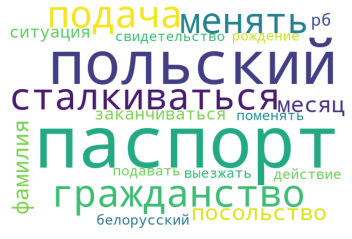

In [107]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(12)

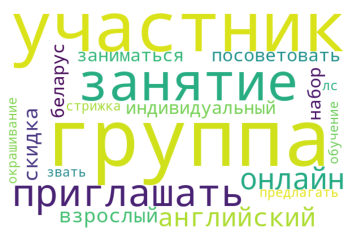

In [108]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(13)

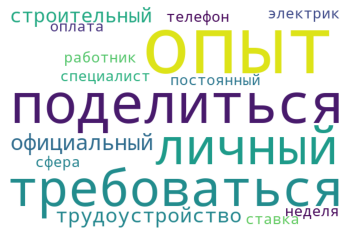

In [109]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic = " "
    comp = nmf.components_[index]
    vocab_comp = zip(vocabulary, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    for word in sorted_words: imp_words_topic = imp_words_topic+ " " +word[0]
    wordcloud = WordCloud(background_color="white", width=600, height=400,colormap='viridis')
    wordcloud.generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

draw_word_cloud(14)